# logistic classification 

Task: Given the HR data set find make amodel that can predict given certain inputs whether some one will leave or stay with the company..


In [23]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style(style='darkgrid')

%matplotlib inline

In [2]:
#importing the dataset
path = r"C:\Users\M D\Desktop\practice projects\HR_comma_sep.csv"
df = pd.read_csv(path)

In [3]:
#view of hte first 5 entires
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# getting the shape of df
df.shape


(14999, 10)

In [5]:
#getting info on df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
#changing to the  right dytpes
categories_columns = ["Department",'salary','left','promotion_last_5years','Work_accident']
df[categories_columns] = df[categories_columns].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  category
 6   left                   14999 non-null  category
 7   promotion_last_5years  14999 non-null  category
 8   Department             14999 non-null  category
 9   salary                 14999 non-null  category
dtypes: category(5), float64(2), int64(3)
memory usage: 660.1 KB


In [7]:
#getting column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
#checking total nulls in each feature
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

Text(0.5, 0.98, 'Countplots for Employee  who left ')

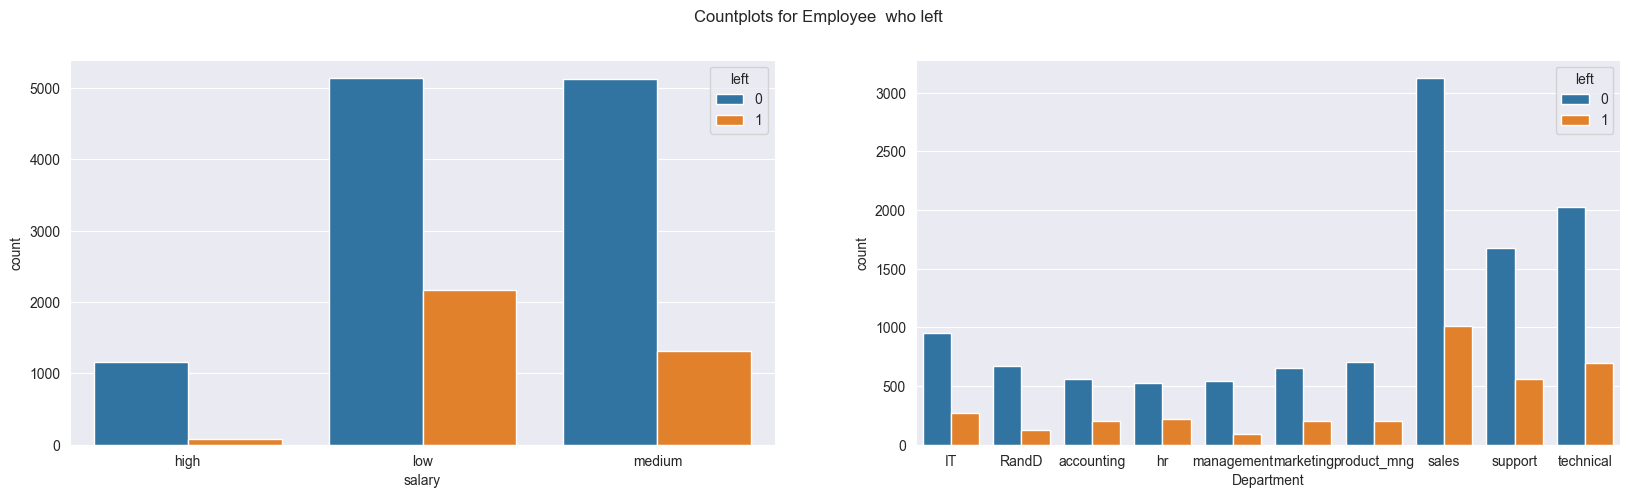

In [9]:
#visual of the count of the people leaving the company
fig , ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(data=df, x='salary',hue='left',ax=ax[0])

sns.countplot(data=df, x='Department',hue='left',ax=ax[1])

fig.suptitle('Countplots for Employee  who left ')

In [10]:
# run cell for individual plot 
#pd.crosstab(df.salary,df.left).plot(kind='bar')
#pd.crosstab(df.Department,df.left).plot(kind='bar')


In [11]:
#importing  labelencoder
from sklearn.preprocessing import LabelEncoder

dept_label_encoder = LabelEncoder()
salary_label_encoder = LabelEncoder()


In [12]:
# label encoding 
df['salary']=salary_label_encoder.fit_transform(df['salary'])
df['Department']=dept_label_encoder.fit_transform(df['Department'])

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [13]:
#one hot encoding 
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [14]:
one_hot_encoder.fit_transform(df[['Department', 'salary']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  category
 6   left                   14999 non-null  category
 7   promotion_last_5years  14999 non-null  category
 8   Department             14999 non-null  int32   
 9   salary                 14999 non-null  int32   
dtypes: category(3), float64(2), int32(2), int64(3)
memory usage: 747.5 KB


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company']] =\
scaler.fit_transform(df[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company']])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,0,1,0,7,1
1,0.752814,0.840707,0.971113,1.220423,1.713436,0,1,0,7,2
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0,1,0,7,2
3,0.431041,0.899131,0.971113,0.439508,1.028546,0,1,0,7,1
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,0,1,0,7,1


In [16]:
#input(X) and output selection (Y)
X=df.drop('left',axis=1)
y=df['left']
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True , stratify=y)

In [18]:
#training model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [24]:
#checking score of model
accuracy = model.score(X_test,y_test)
print(f'{accuracy*100}%')

76.1%


In [26]:
#predicting with model
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [21]:
#classification report of model
report = classification_report(y_pred,y_test)
print("classification_report")
print(report)

classification_report
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      2661
           1       0.24      0.50      0.32       339

    accuracy                           0.76      3000
   macro avg       0.58      0.65      0.59      3000
weighted avg       0.85      0.76      0.79      3000

